In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(Xtrain,ytrain), (Xtest,ytest) = keras.datasets.cifar10.load_data()

In [3]:
Xtrain.shape

(50000, 32, 32, 3)

In [4]:
Xtest.shape

(10000, 32, 32, 3)

In [5]:
ytest.shape

(10000, 1)

In [6]:
ytrain.shape

(50000, 1)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
ytrain = ytrain.reshape(-1,)
ytrain

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
ytest = ytest.reshape(-1,)
ytest

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [10]:
Xtrain[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [11]:
def plot_sample(X,y,i):
    plt.figure(figsize=(8,3))
    plt.imshow(X[i])
    plt.xlabel(classes[y[i]])

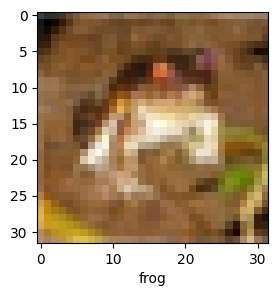

In [12]:
plot_sample(Xtrain,ytrain,0)

In [13]:
# normalization
Xtrain = Xtrain/255
Xtest = Xtest/255

In [14]:
Xtrain[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [15]:
# Building ANN model
ann = keras.models.Sequential([
    keras.layers.InputLayer(shape=(32,32,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(Xtrain,ytrain,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 316s 199ms/step - accuracy: 0.2789 - loss: 2.2171
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 320s 204ms/step - accuracy: 0.3978 - loss: 1.6886
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 312s 199ms/step - accuracy: 0.4250 - loss: 1.5921
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 304s 194ms/step - accuracy: 0.4503 - loss: 1.5423
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 326s 208ms/step - accuracy: 0.4631 - loss: 1.4964
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 310s 198ms/step - accuracy: 0.4768 - loss: 1.4551
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 308s 197ms/step - accuracy: 0.4839 - loss: 1.4402
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 299s 191ms/step - accuracy: 0.5057 - loss: 1.3819


In [16]:
ann.evaluate(Xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.4861 - loss: 1.4469


[1.447264552116394, 0.4869000017642975]

In [17]:
ypred = ann.predict(Xtest)
ypred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


array([[1.00696154e-01, 8.25578868e-02, 1.63188931e-02, 4.14942682e-01,
        8.53303820e-02, 1.79189891e-01, 6.20110426e-03, 2.80402862e-02,
        5.87325729e-02, 2.79901512e-02],
       [6.44887909e-02, 1.04249321e-01, 1.42618828e-03, 4.89680504e-04,
        7.21983728e-04, 8.69007257e-04, 3.46562912e-04, 3.84193205e-04,
        2.88269371e-01, 5.38754940e-01],
       [2.59085745e-01, 1.33684978e-01, 6.57243747e-03, 3.06840497e-03,
        4.34303889e-03, 6.97496952e-03, 5.22679300e-04, 4.85020168e-02,
        3.37858081e-01, 1.99387714e-01],
       [1.35078013e-01, 2.85460036e-02, 6.72042519e-02, 1.89485718e-02,
        3.60772125e-02, 7.64896255e-03, 8.19194247e-04, 7.07327425e-02,
        5.02633512e-01, 1.32311478e-01],
       [6.05153909e-05, 7.53558288e-06, 5.26789241e-02, 1.41138220e-02,
        8.99946630e-01, 9.48010013e-03, 2.16406099e-02, 1.94681284e-03,
        1.09725413e-04, 1.53051806e-05]], dtype=float32)

In [18]:
ypred_classes = [np.argmax(i) for i in ypred]
ypred_classes[:5]

[3, 9, 8, 8, 4]

In [19]:
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_classes))

              precision    recall  f1-score   support

           0       0.59      0.51      0.55      1000
           1       0.68      0.54      0.60      1000
           2       0.37      0.31      0.33      1000
           3       0.37      0.24      0.29      1000
           4       0.36      0.56      0.44      1000
           5       0.39      0.44      0.41      1000
           6       0.47      0.61      0.53      1000
           7       0.55      0.53      0.54      1000
           8       0.62      0.59      0.60      1000
           9       0.56      0.55      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



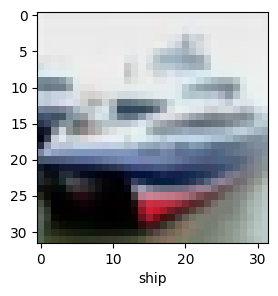

In [21]:
plot_sample(Xtest,ytest,1)

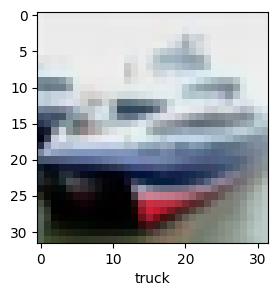

In [22]:
plot_sample(Xtest,ypred_classes,1)

<h3 style="color: brown;">Building model using CNN</h3>

In [23]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation="relu",input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
# we have used softmax instead of sigmoid as sigmoid is used when we use one hot encoding for encoding the classes but when we consider a single class
# with multiple labels then we use softmax

C:\Users\DeveshNarain\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
cnn.fit(Xtrain,ytrain,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.3904 - loss: 1.6768
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6011 - loss: 1.1401
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6555 - loss: 0.9903
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6832 - loss: 0.9068
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7150 - loss: 0.8184
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7372 - loss: 0.7639
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7501 - loss: 0.7162
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7748 - loss: 0.6541
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7843 - loss: 0.6169
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8000 - loss: 0.5804


In [26]:
cnn.evaluate(Xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6981 - loss: 0.9358


[0.9370225667953491, 0.6972000002861023]

In [27]:
y_pred = cnn.predict(Xtest)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[2.9581750e-03, 5.8282894e-05, 3.5900256e-04, 7.6559865e-01,
        5.7978823e-04, 1.9457866e-01, 1.6437595e-03, 1.2948550e-02,
        2.1211347e-02, 6.3838961e-05],
       [2.1941619e-02, 2.3682852e-01, 1.5482055e-07, 1.9913100e-06,
        2.7831686e-09, 1.5282318e-07, 3.3648178e-08, 8.3409745e-08,
        7.3378229e-01, 7.4451501e-03],
       [5.6205165e-02, 8.2271874e-01, 4.4776018e-05, 2.9944715e-03,
        1.0774089e-04, 4.6227993e-05, 1.3213083e-03, 1.3951394e-04,
        5.2037198e-02, 6.4384811e-02],
       [9.8440206e-01, 2.2029390e-03, 1.1495705e-03, 1.5994208e-03,
        5.9528666e-04, 1.0266502e-05, 8.6608152e-06, 1.6734307e-04,
        7.5392835e-03, 2.3250759e-03],
       [1.4304355e-06, 6.6522829e-05, 1.6966388e-02, 2.8416708e-02,
        6.8383610e-01, 1.7362183e-02, 2.5324705e-01, 2.0956484e-05,
        7.5489879e-05, 7.1869667e-06]], dtype=float32)

In [28]:
y_pred_classes = [np.argmax(i) for i in ypred]
y_pred_classes[:5]

[3, 9, 8, 8, 4]

In [1]:
plot_sample(Xtest,ytest,0)

NameError: name 'plot_sample' is not defined

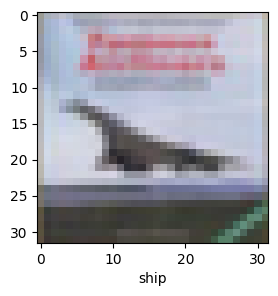

In [30]:
plot_sample(Xtest,y_pred_classes,3)